In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('loan_approved.csv')
print(df)
df.nunique()

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

Loan_ID                   614
Gender                      2
Married                     2
Dependents                  4
Education                   2
Self_Employed               2
ApplicantIncome           505
CoapplicantIncome         287
LoanAmount                203
Loan_Amount_Term           10
Credit_History              2
Property_Area               3
Loan_Status (Approved)      2
dtype: int64

In [3]:
col = df["Loan_ID"]
print("Data Type:", col.dtype)

if col.dtype == "object":
    print("Column Type: Nominal Categorical")
    print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

# Handle missing values
mode_value = col.mode()[0]
df["Loan_ID_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

# Category Analysis
print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

# One-Hot Encoding
dummies = pd.get_dummies(df["Loan_ID_filled"], prefix="Loan_ID")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal Categorical
Unique Values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP0012

In [4]:
col = df["Gender"]
print("Data Type:", col.dtype)

if col.dtype == "object":
    print("Column Type: Nominal Categorical")
    print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Gender_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

dummies = pd.get_dummies(df["Gender_filled"], prefix="Gender")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal Categorical
Unique Values: ['Male' 'Female' nan]
Missing Values: 13
Missing filled with MODE: Male
Value Counts:
Gender
Male      489
Female    112
Name: count, dtype: int64
Summary Statistics:
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
One-Hot Encoding:
   Gender_Female  Gender_Male
0          False         True
1          False         True
2          False         True
3          False         True
4          False         True


In [5]:
col = df["Married"]
print("Data Type:", col.dtype)

if col.dtype == "object":
    print("Column Type: Nominal Categorical")
    print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Married_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

dummies = pd.get_dummies(df["Married_filled"], prefix="Married")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal Categorical
Unique Values: ['No' 'Yes' nan]
Missing Values: 3
Missing filled with MODE: Yes
Value Counts:
Married
Yes    398
No     213
Name: count, dtype: int64
Summary Statistics:
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
One-Hot Encoding:
   Married_No  Married_Yes
0        True        False
1       False         True
2       False         True
3       False         True
4        True        False


In [6]:
col = df["Dependents"]
print("Data Type:", col.dtype)
print("Column Type: Ordinal")
print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Dependents_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Dependents_label"] = le.fit_transform(df["Dependents_filled"])

print("Label Encoded Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Data Type: object
Column Type: Ordinal
Unique Values: ['0' '1' '2' '3+' nan]
Missing Values: 15
Missing filled with MODE: 0
Value Counts:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Summary Statistics:
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
Label Encoded Mapping:
{'0': np.int64(0), '1': np.int64(1), '2': np.int64(2), '3+': np.int64(3)}


In [7]:
col = df["Education"]
print("Data Type:", col.dtype)
print("Column Type: Nominal")
print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Education_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

dummies = pd.get_dummies(df["Education_filled"], prefix="Education")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal
Unique Values: ['Graduate' 'Not Graduate']
Missing Values: 0
Missing filled with MODE: Graduate
Value Counts:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Summary Statistics:
count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
One-Hot Encoding:
   Education_Graduate  Education_Not Graduate
0                True                   False
1                True                   False
2                True                   False
3               False                    True
4                True                   False


In [8]:
col = df["Self_Employed"]
print("Data Type:", col.dtype)
print("Column Type: Nominal")
print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Self_Employed_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

dummies = pd.get_dummies(df["Self_Employed_filled"], prefix="Self_Employed")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal
Unique Values: ['No' 'Yes' nan]
Missing Values: 32
Missing filled with MODE: No
Value Counts:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Summary Statistics:
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
One-Hot Encoding:
   Self_Employed_No  Self_Employed_Yes
0              True              False
1              True              False
2             False               True
3              True              False
4              True              False


In [9]:
col = df["ApplicantIncome"]
print("Data Type:", col.dtype)
print("Column Type: Continuous Numeric")

print("Missing Values:", col.isnull().sum())

median_value = col.median()
df["ApplicantIncome_filled"] = col.fillna(median_value)
print("Missing filled with MEDIAN:", median_value)

print("Summary Statistics:")
print(col.describe())


Data Type: int64
Column Type: Continuous Numeric
Missing Values: 0
Missing filled with MEDIAN: 3812.5
Summary Statistics:
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


In [10]:
col = df["LoanAmount"]
print("Data Type:", col.dtype)
print("Column Type: Continuous Numeric")

print("Missing Values:", col.isnull().sum())

median_value = col.median()
df["LoanAmount_filled"] = col.fillna(median_value)
print("Missing filled with MEDIAN:", median_value)

print("Summary Statistics:")
print(col.describe())


Data Type: float64
Column Type: Continuous Numeric
Missing Values: 22
Missing filled with MEDIAN: 128.0
Summary Statistics:
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


In [11]:
col = df["Credit_History"]
print("Data Type:", col.dtype)
print("Column Type: Discrete Numeric / Binary")

print("Missing Values:", col.isnull().sum())

median_value = col.median()
df["Credit_History_filled"] = col.fillna(median_value)
print("Missing filled with MEDIAN:", median_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())


Data Type: float64
Column Type: Discrete Numeric / Binary
Missing Values: 50
Missing filled with MEDIAN: 1.0
Value Counts:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Summary Statistics:
count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


In [12]:
col = df["Loan_Amount_Term"]
print("Data Type:", col.dtype)
print("Column Type: Continuous Numeric")

print("Missing Values:", col.isnull().sum())

median_value = col.median()
df["Loan_Amount_Term_filled"] = col.fillna(median_value)
print("Missing filled with MEDIAN:", median_value)

print("Summary Statistics:")
print(col.describe())


Data Type: float64
Column Type: Continuous Numeric
Missing Values: 14
Missing filled with MEDIAN: 360.0
Summary Statistics:
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


In [13]:
col = df["Property_Area"]
print("Data Type:", col.dtype)
print("Column Type: Nominal")
print("Unique Values:", col.unique())

print("Missing Values:", col.isnull().sum())

mode_value = col.mode()[0]
df["Property_Area_filled"] = col.fillna(mode_value)
print("Missing filled with MODE:", mode_value)

print("Value Counts:")
print(col.value_counts())

print("Summary Statistics:")
print(col.describe())

dummies = pd.get_dummies(df["Property_Area_filled"], prefix="Property_Area")
print("One-Hot Encoding:")
print(dummies.head())


Data Type: object
Column Type: Nominal
Unique Values: ['Urban' 'Rural' 'Semiurban']
Missing Values: 0
Missing filled with MODE: Semiurban
Value Counts:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Summary Statistics:
count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
One-Hot Encoding:
   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban
0                False                    False                 True
1                 True                    False                False
2                False                    False                 True
3                False                    False                 True
4                False                    False                 True


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Select column
col = df["ApplicantIncome"]

# Apply log transformation
la_trans = np.log1p(col)   # log1p handles 0 values safely

# Convert to pandas Series
la_series = pd.Series(la_trans)

print("Skewness:", la_series.skew())
print("Kurtosis:", la_series.kurtosis())


Skewness: 0.4821279953732817
Kurtosis: 3.678710687140339


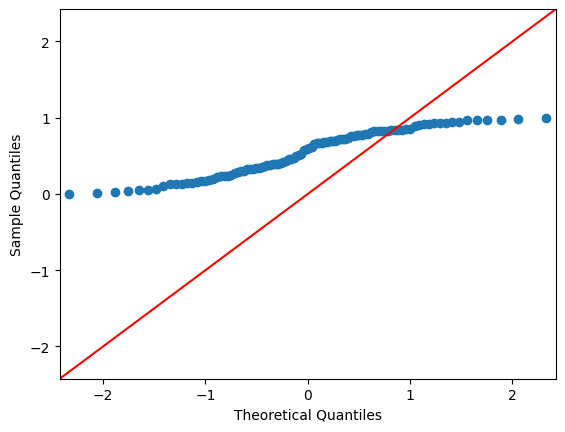

In [ ]:
import numpy as np
import pylab as py
import statsmodels.api as sm

data = np.random.rand(100)   # random uniform data

sm.qqplot(data, line='45')
py.show()

In [23]:
df.to_csv("preprocessed_loan_approved.csv", index=False)


In [3]:
z = (df["ApplicantIncome"] - df["ApplicantIncome"].mean()) / df["ApplicantIncome"].std()


In [6]:
df["CoapplicantIncome"].skew()
df["CoapplicantIncome"].kurtosis()


84.95638421103374

In [11]:
trans = PowerTransformer(method='yeo-johnson')
la_trans = trans.fit_transform(df[["CoapplicantIncome"]])


In [12]:
df["CoapplicantIncome"].skew()
df["CoapplicantIncome"].kurtosis()


84.95638421103374

In [13]:
trans = PowerTransformer(method='yeo-johnson')
la_trans = trans.fit_transform(df[["CoapplicantIncome"]])


In [21]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# 1️ Create spending_scores
spending_scores = df["LoanAmount"].dropna()   # OR any numeric column

# 2️ Apply transformation
np.log(df["LoanAmount"])
df["LoanAmount_cuberoot"] = df["LoanAmount"] ** (1/3)

# 3️ Run z-test
z_stat, p_value = ztest(spending_scores, value=50)

print("Z-Statistic:", z_stat)
print("p-value:", p_value)


Z-Statistic: 27.408370846966424
p-value: 2.179678759602223e-165
